In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import dataset as dd # custom dataset class
%matplotlib inline

/home/pkllee/anaconda2/envs/tf/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
im_ref, im_us = dd.get_dataset(1)
print(im_us.shape)
print(im_ref.shape)

(320, 320, 256, 8)
(320, 320, 256, 1)


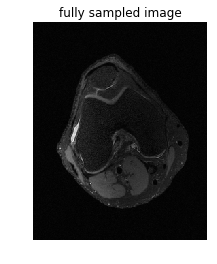

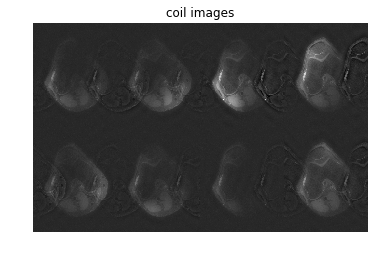

In [3]:
slice_to_show = 160

N, X, Y, C = im_us.shape

def show_ref_and_coil_ims(slice_to_show, im_ref, im_us):
    plt.imshow(im_ref[slice_to_show, :, :, 0], cmap='gray')
    plt.title('fully sampled image')
    plt.axis('off')
    plt.show()

    coil_ims = np.transpose(im_us[slice_to_show, :, :, :], (2, 0, 1))
    coil_ims_to_show = np.reshape(coil_ims[0:2, :, :], (2 * X, Y))

    for ii in range(1, 4):
        coil_ims_to_show = np.concatenate((coil_ims_to_show, 
                                           np.reshape(coil_ims[2 * ii: 2 * (ii + 1), :, :], (2 * X, Y))), axis=1)  

    plt.imshow(coil_ims_to_show, cmap='gray')
    plt.title('coil images')
    plt.axis('off')
    plt.show()
    
show_ref_and_coil_ims(slice_to_show, im_ref, im_us)

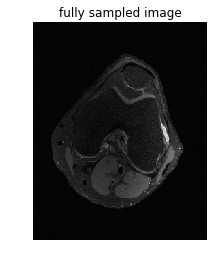

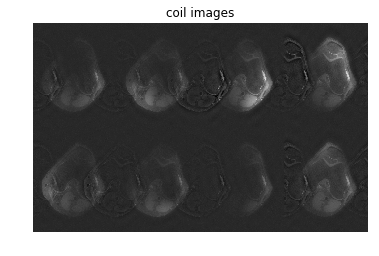

In [4]:
im_ref_tf, im_us_tf = dd.transform_image(im_ref, im_us, dd.Transform.FLIP_HOR)

show_ref_and_coil_ims(slice_to_show, im_ref_tf, im_us_tf)

In [ ]:
# https://www.tensorflow.org/programmers_guide/datasets

input_vals = tf.keras.Input(shape=(im_us.shape[1:]))
conv1 = tf.keras.layers.Conv2D(filters=12, kernel_size=7, padding='same', 
                                activation='relu')(input_vals)
output = tf.keras.layers.Dense(1)(conv1)
model = tf.keras.Model(inputs=input_vals, outputs=output)

model.compile('rmsprop', 'mse')

history = model.fit(x=im_us, y=im_ref, epochs=5, batch_size = 16)

In [ ]:
print(history.history)

In [ ]:
im_pred = model.predict(im_us)

In [ ]:
slice_to_show = 100

plt.imshow(im_pred[slice_to_show, :, :, 0], cmap='gray')
plt.title('training prediction')
plt.axis('off')
plt.show()